Autoencoder

Tutorial:
https://morvanzhou.github.io/tutorials/machine-learning/keras/2-6-autoencoder/

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

/home/anthony/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, y_test) = mnist.load_data()


In [3]:
# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(784,))

In [5]:
# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

In [6]:
# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

In [8]:
# 完整的encode decode模型
autoencoder = Model(input=input_img, output=decoded)

# 只做了encode，显示encode之后的内容，以便后续做二维可视化
encoder = Model(input=input_img, output=encoder_output)

/home/anthony/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/home/anthony/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """


In [9]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')


In [10]:
# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0691
Epoch 2/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0544
Epoch 3/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0510
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0485
Epoch 5/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0470
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0457
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0448
Epoch 8/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0439
Epoch 9/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0433
Epoch 10/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0432
Epoch 11/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0425
Epoch 12/20
60000/60000 [===========================

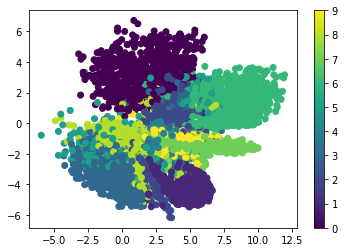

In [11]:
# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()
